# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [49]:
# Import essential libraries for data manipulation and analysis

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("C:\\Users\\Harshit\\Documents\\ML_demo\\LR_Assignment_Details\\porter_data_1.csv")

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [53]:
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [55]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [57]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])

In [59]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [65]:
# Convert categorical features to category type
object_cols = porter.select_dtypes(include='object').columns.tolist()
low_cardinality = [col for col in porter.columns if porter[col].nunique() < 20 and porter[col].dtype in ['int64', 'float64']]
categorical_cols = list(set(object_cols + low_cardinality))

for col in categorical_cols:
  porter[col] = porter[col].astype('category')
porter["store_primary_category"] = porter["store_primary_category"].astype('category')
# Optional: check the result
print(porter[categorical_cols].dtypes)


market_id         category
order_protocol    category
dtype: object


In [67]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [69]:
# Calculate time taken in minutes
porter['time_taken_minutes'] = (porter['actual_delivery_time'] - porter['created_at']).dt.total_seconds() / 60
print(porter[['created_at', 'actual_delivery_time', 'time_taken_minutes']].head())

           created_at actual_delivery_time  time_taken_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [71]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['order_hour'] = porter['created_at'].dt.hour
porter['order_day_of_week'] = porter['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter['order_day_of_week'].isin(['Saturday', 'Sunday'])
porter['isWeekend'] = porter['isWeekend'].astype('category')
print(porter[['created_at', 'order_hour', 'order_day_of_week', 'isWeekend']].head())

           created_at  order_hour order_day_of_week isWeekend
0 2015-02-06 22:24:17          22            Friday     False
1 2015-02-10 21:49:25          21           Tuesday     False
2 2015-02-16 00:11:35           0            Monday     False
3 2015-02-12 03:36:46           3          Thursday     False
4 2015-01-27 02:12:36           2           Tuesday     False


In [73]:
# Drop unnecessary columns
porter.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)
print(porter.head())

  market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  tim

In [ ]:
porter.to_csv('C:\\Users\\Harshit\\Documents\\ML_demo\\LR_Assignment_Details\\output_beforeTrain.csv', index=False)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [47]:
# Define target variable (y) and features (X)
target = 'time_taken_minutes
features = [
    'order_hour', 'order_day_of_week', 'isWeekend',
    'store_primary_category', 'market_id', 'order_protocol',
    'subtotal', 'total_onshift_dashers', 'total_busy_dashers'
]
X = porter[features]
y = porter[target]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [75]:
# Split data into training and testing sets
df_train, df_test = train_test_split(porter, train_size = 0.8, test_size = 0.2, random_state = 100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [81]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
    'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
    'total_outstanding_orders', 'distance'
]
  
categorical_columns = ['market_id','store_primary_category','order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

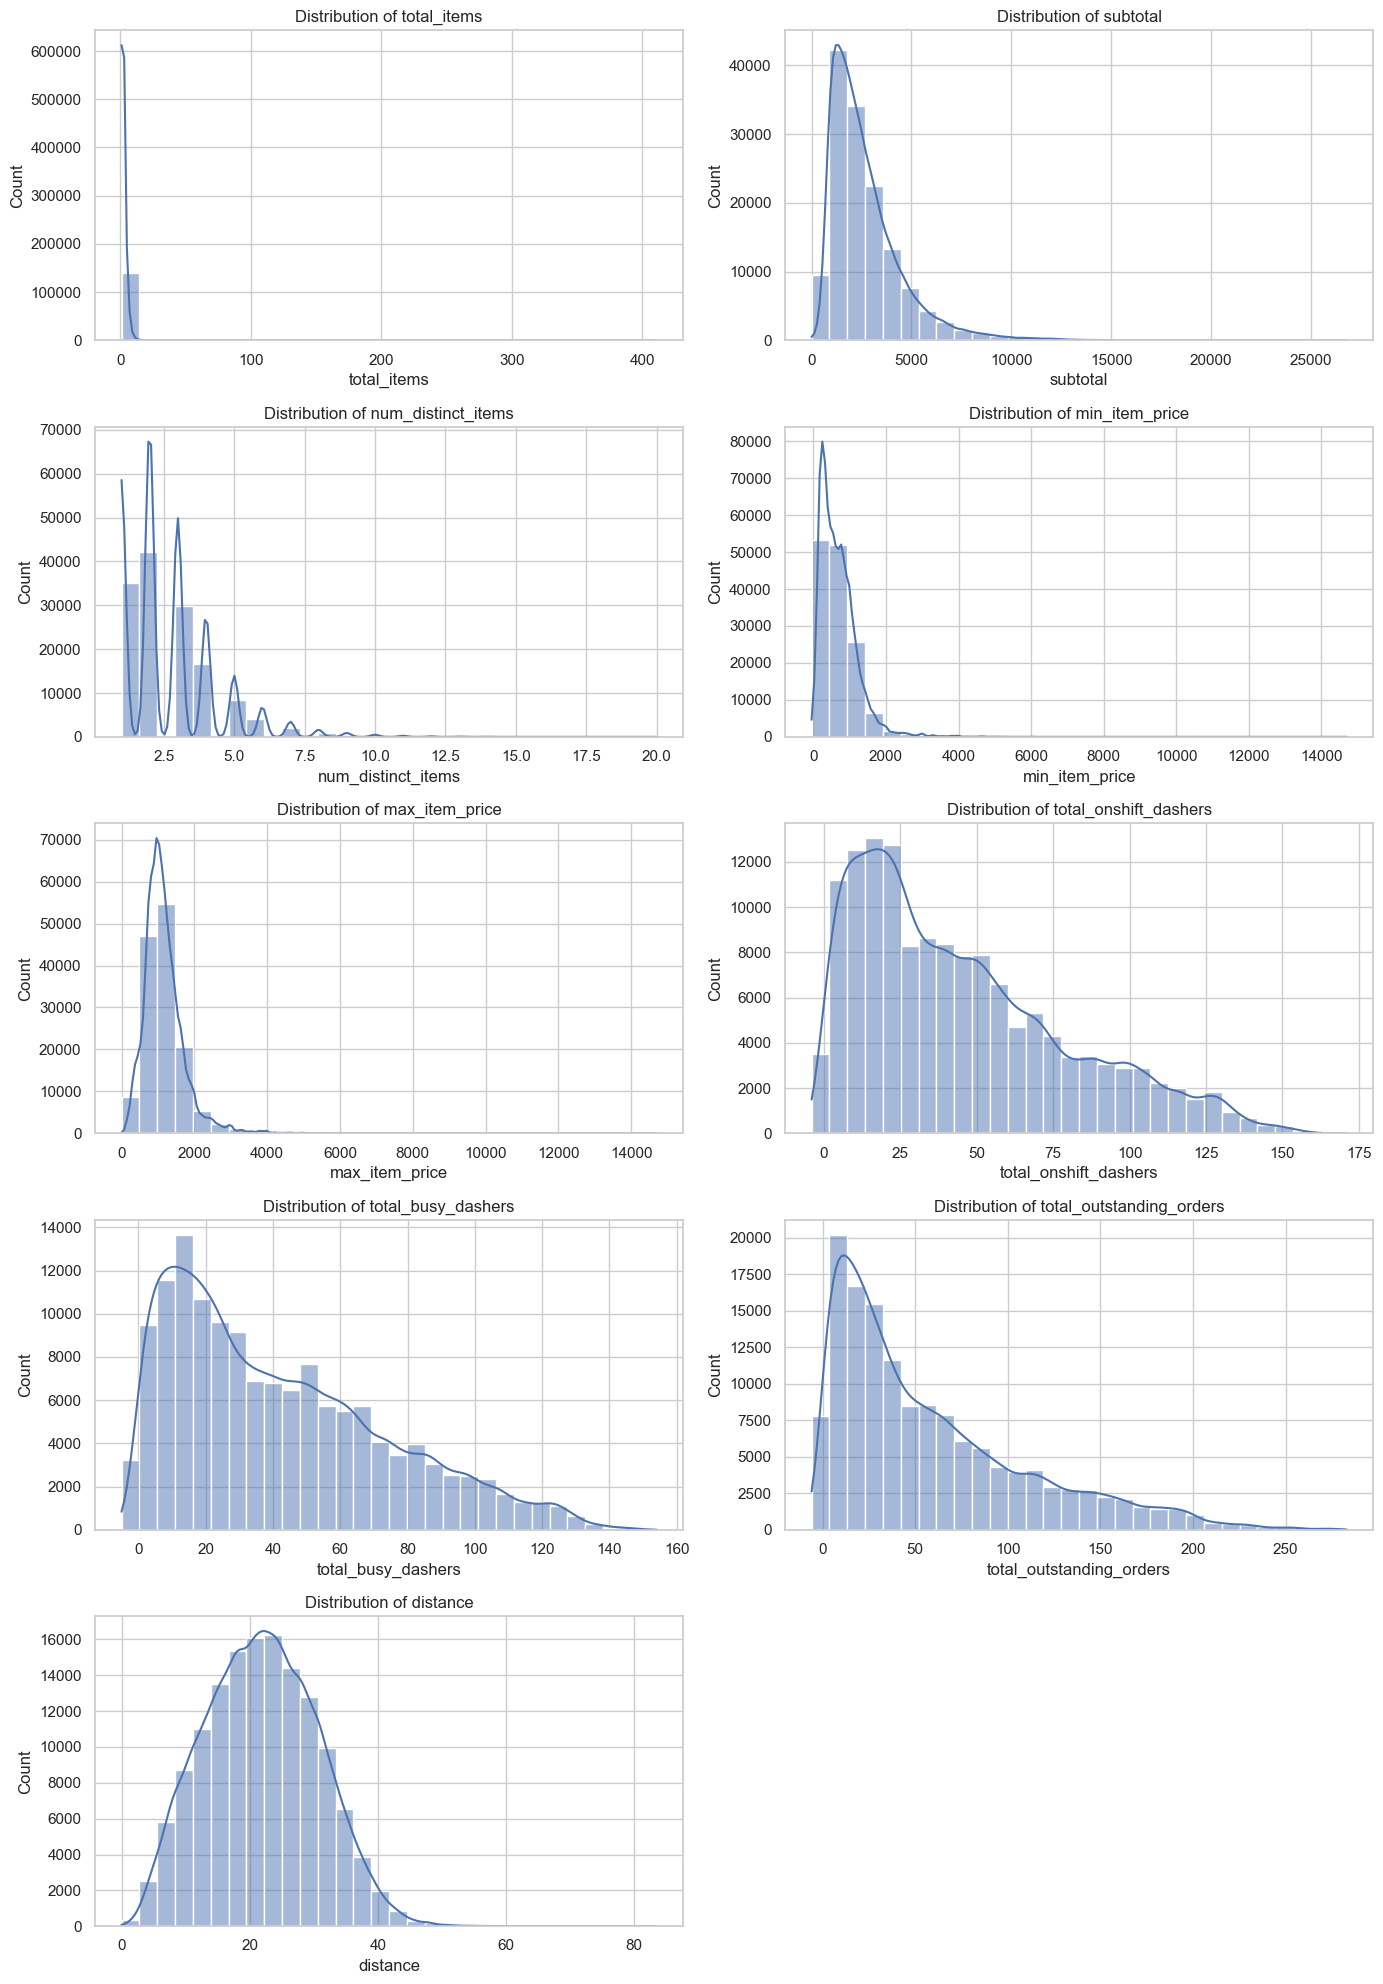

In [141]:
# Plot distributions for all numerical columns

sns.set(style="whitegrid")

# Create subplots for each numerical column
n_cols = 2
n_rows = (len(numerical_columns) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

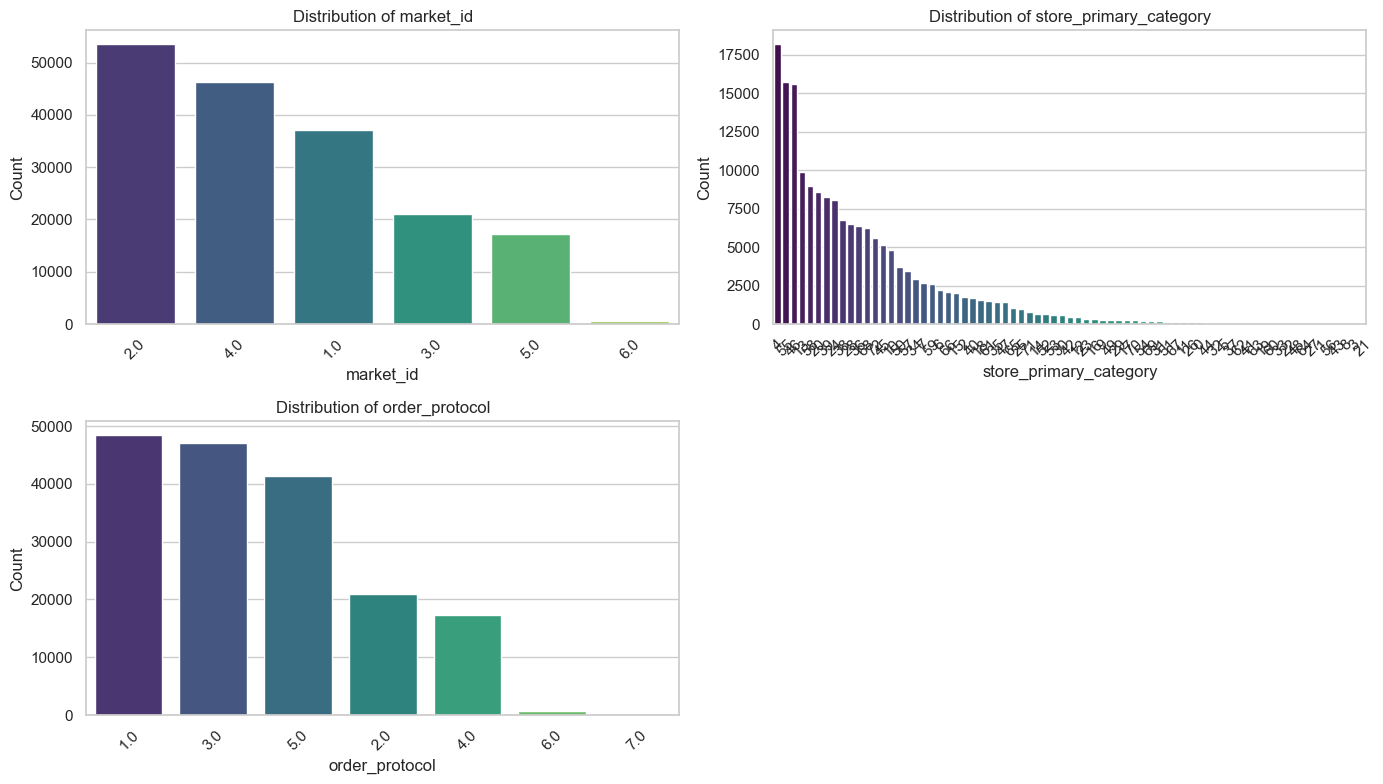

In [143]:
# Distribution of categorical columns
# Set style
sns.set(style="whitegrid")

# Plot bar plots for each categorical column
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    order = df_train[col].value_counts().index
    sns.countplot(data=porter, x=col, order=order, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

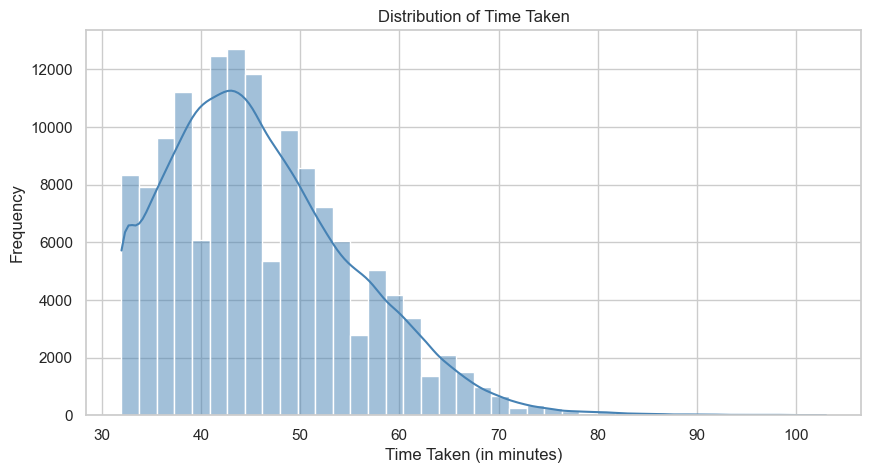

In [145]:
# Distribution of time_taken

sns.set(style="whitegrid")

# Plot distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(df_train['time_taken_minutes'], kde=True, bins=40, color='steelblue')
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (in minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

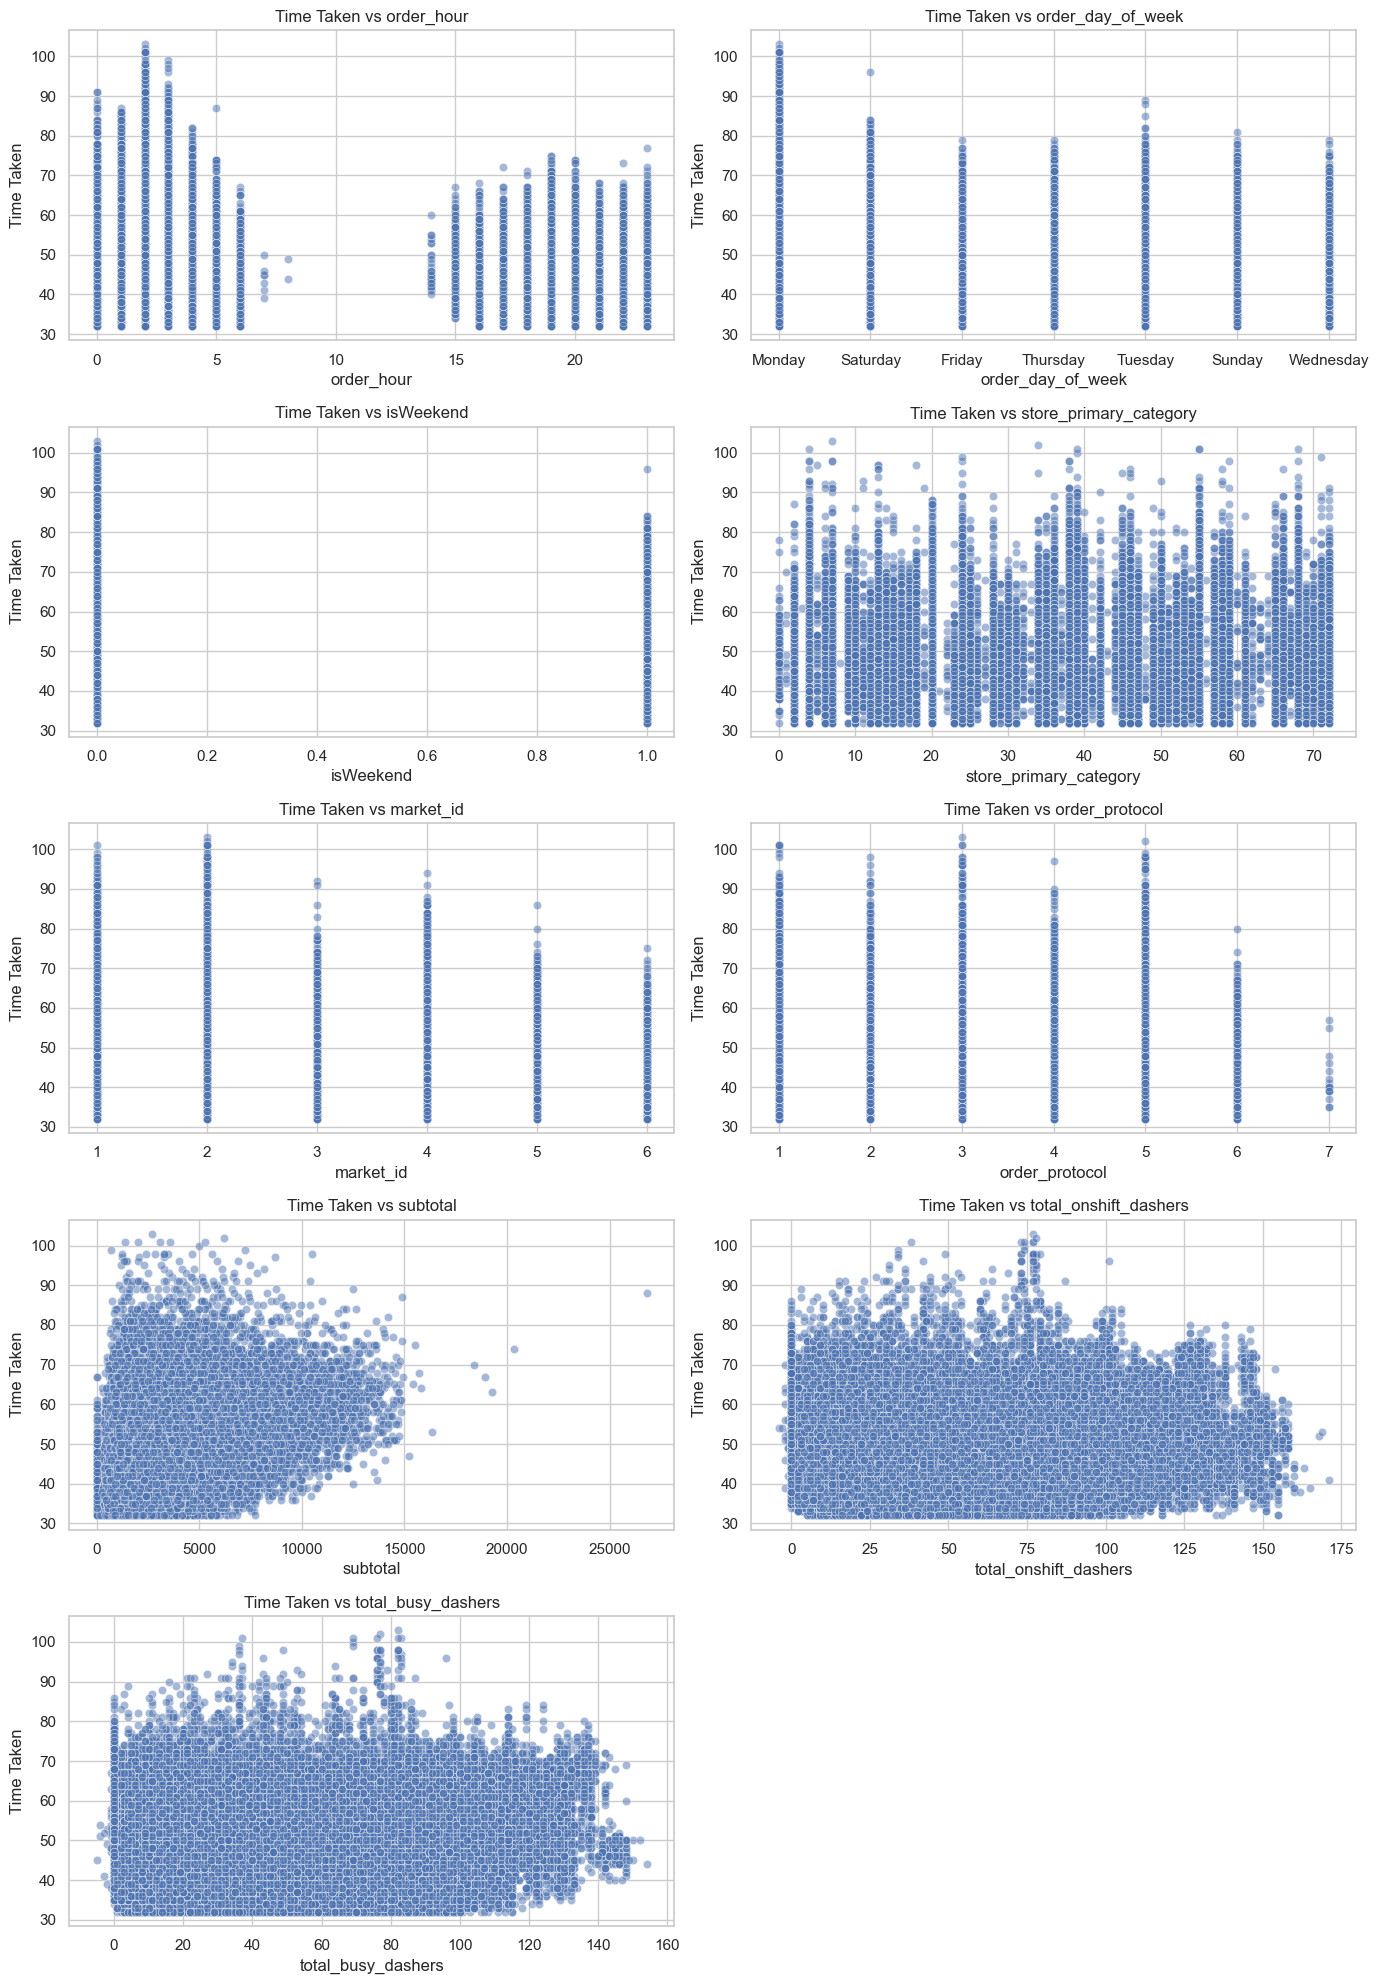

In [147]:
# Scatter plot to visualise the relationship between time_taken and other features
target = 'time_taken_minutes'
features = [
    'order_hour', 'order_day_of_week', 'isWeekend',
    'store_primary_category', 'market_id', 'order_protocol',
    'subtotal', 'total_onshift_dashers', 'total_busy_dashers'
]

sns.set(style="whitegrid")

# Create scatter plots
n_cols = 2
n_rows = (len(numerical_columns) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=df_train, x=col, y='time_taken_minutes', alpha=0.5)
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken')

plt.tight_layout()
plt.show()


In [97]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken_minutes        175777 non-null  float64 
 13  order_hour                175

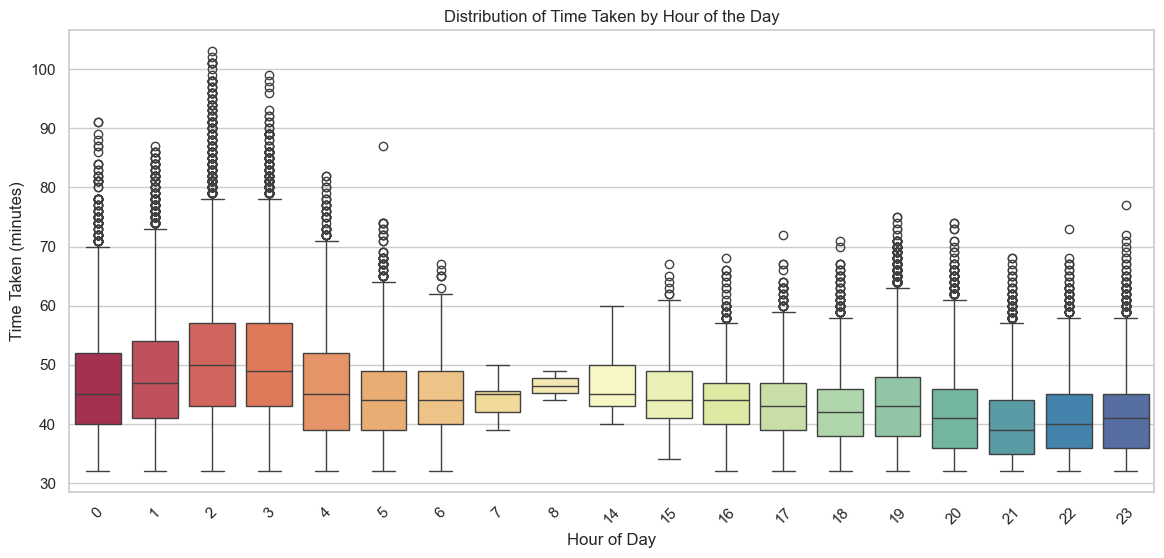

In [149]:
# Show the distribution of time_taken for different hours

sns.set(style="whitegrid")

# Boxplot: Distribution of time_taken_minutes by hour
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_train, x='order_hour', y='time_taken_minutes', palette='Spectral')
plt.title('Distribution of Time Taken by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()

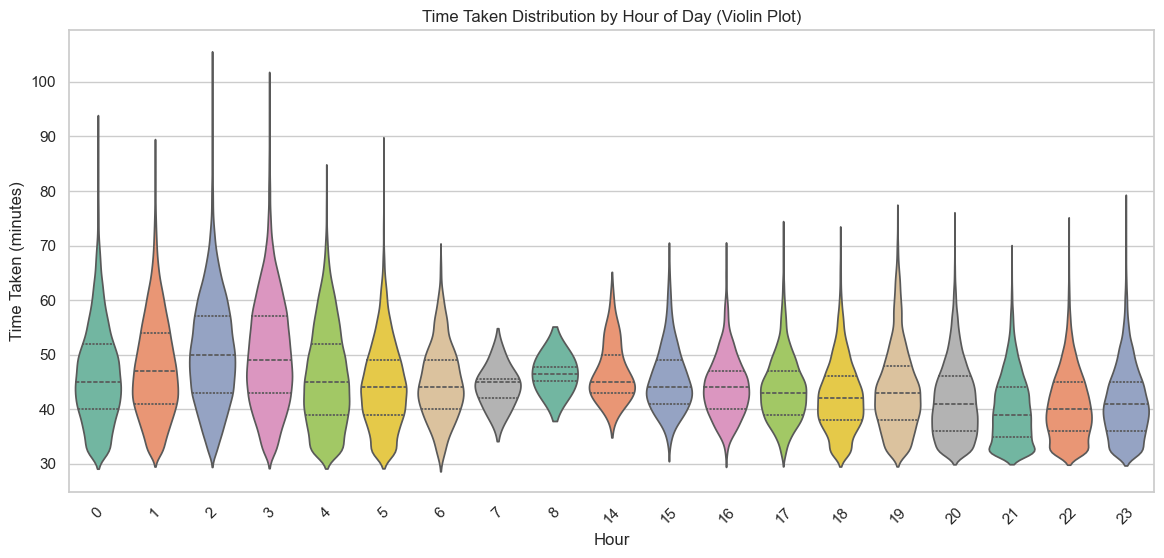

In [151]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_train, x='order_hour', y='time_taken_minutes', palette='Set2', inner='quartile')
plt.title('Time Taken Distribution by Hour of Day (Violin Plot)')
plt.xlabel('Hour')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

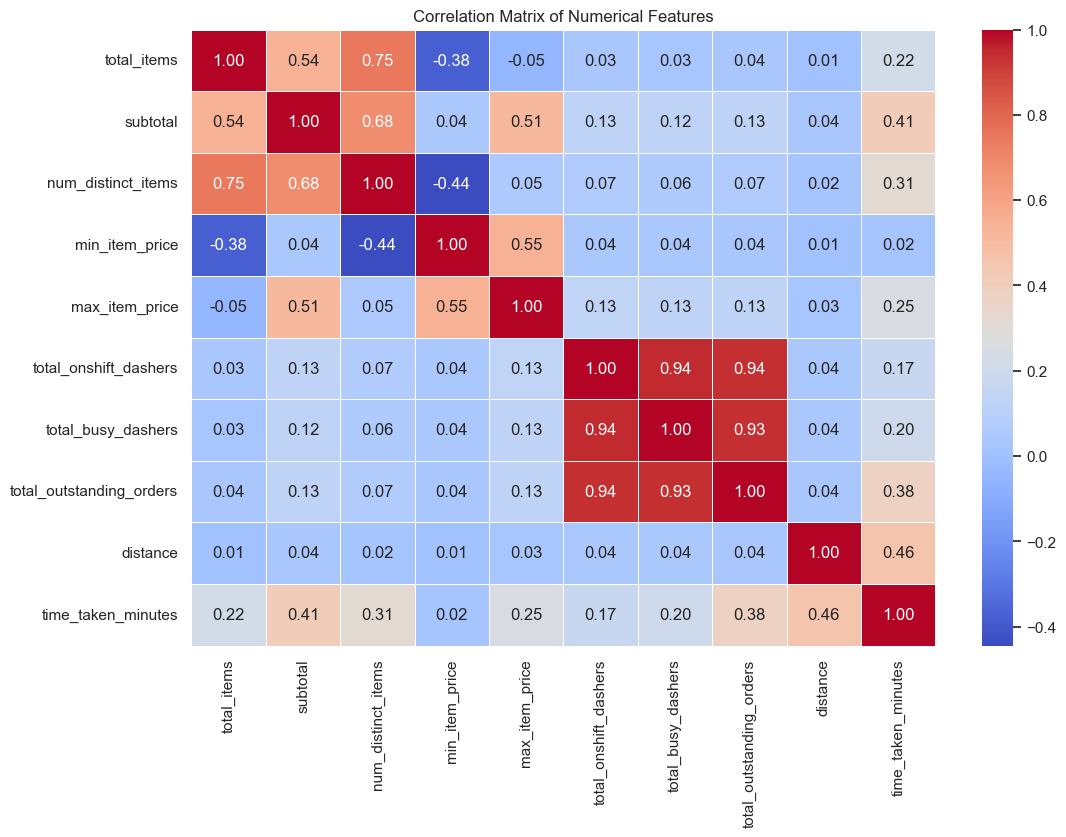

In [153]:
# Plot the heatmap of the correlation matrix
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_train[numerical_cols].corr()
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [155]:
# Drop 3-5 weakly correlated columns from training dataset

# Select only numerical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation with target
correlations = df_train[numerical_cols].corr()['time_taken_minutes'].abs().sort_values()

# Display correlation values (optional)
print("Correlation with 'time_taken_minutes':\n", correlations)
#print("week Correlation list:\n", correlations[correlations < 0.05].index.tolist())
# Identify weakly correlated features (excluding the target itself)
weak_corr_features = correlations[correlations < 0.05].index.tolist()

# Drop weak features from dataset
df_reduced = df_train.drop(columns=weak_corr_features)
# Show which columns were dropped
print("\nDropped weakly correlated features:", weak_corr_features)

Correlation with 'time_taken_minutes':
 min_item_price              0.023411
total_onshift_dashers       0.168299
total_busy_dashers          0.203979
total_items                 0.220891
max_item_price              0.254416
num_distinct_items          0.312917
total_outstanding_orders    0.382738
subtotal                    0.413293
distance                    0.460237
time_taken_minutes          1.000000
Name: time_taken_minutes, dtype: float64

Dropped weakly correlated features: ['min_item_price']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



In [116]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken_minutes        175777 non-null  float64 
 13  order_hour                175

##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [118]:
porter.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_minutes  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   
2                 6.0                      18.0     11.56                55.0   
3                 6.0                       8.0     31.80                59.0   
4                 5.0                       7.0      8.20                46.0   

   order_hour order_day_of_week isWeekend  
0          22            Friday     False  
1          21           Tuesday     False  
2           0            Monday     False  
3           3          Thursday     False  
4           2           Tuesday     False

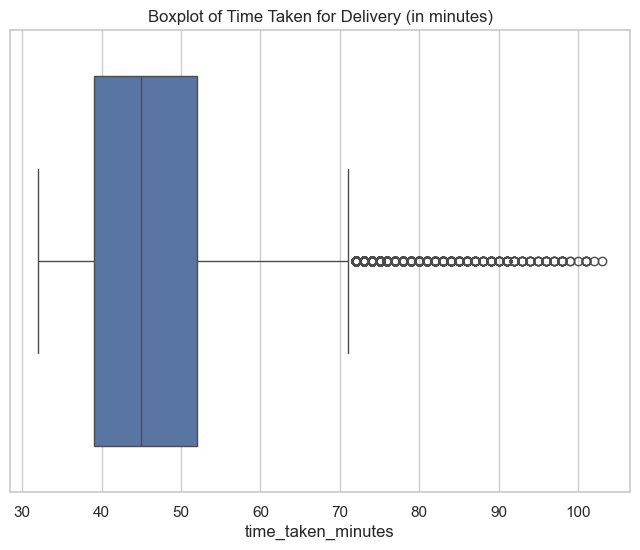

In [157]:
# Boxplot for time_taken

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='time_taken_minutes')
plt.title('Boxplot of Time Taken for Delivery (in minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [161]:
# Handle outliers
# Define a function to detect and remove outliers based on IQR
def remove_outliers(df, cols):
    for col in cols:
        if df[col].dtype in ['int64', 'float64']:  # Only apply to numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 
                  'distance', 'time_taken_minutes']

# Remove outliers from numerical columns
porterAfterOutlier = remove_outliers(df_train, numerical_cols)

# For categorical columns, check rare values and decide how to handle them.
# Example: Grouping rare categories in 'market_id' as 'Other'
porterAfterOutlier['market_id'] = porterAfterOutlier['market_id'].cat.add_categories('Other')
porterAfterOutlier['market_id'] = porterAfterOutlier['market_id'].where(porterAfterOutlier['market_id'].value_counts() > 5, 'Other')

In [ ]:
porterAfterOutlier.to_csv('C:\\Users\\Harshit\\Documents\\ML_demo\\LR_Assignment_Details\\porterAfterOutlier.csv', index=False)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [130]:
porterAfterOutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144987 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 144987 non-null  category
 1   store_primary_category    144987 non-null  category
 2   order_protocol            144987 non-null  category
 3   total_items               144987 non-null  int64   
 4   subtotal                  144987 non-null  int64   
 5   num_distinct_items        144987 non-null  int64   
 6   min_item_price            144987 non-null  int64   
 7   max_item_price            144987 non-null  int64   
 8   total_onshift_dashers     144987 non-null  float64 
 9   total_busy_dashers        144987 non-null  float64 
 10  total_outstanding_orders  144987 non-null  float64 
 11  distance                  144987 non-null  float64 
 12  time_taken_minutes        144987 non-null  float64 
 13  order_hour                144987 n

In [132]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 
                  'distance', 'time_taken_minutes']

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_day_of_week', 'isWeekend']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

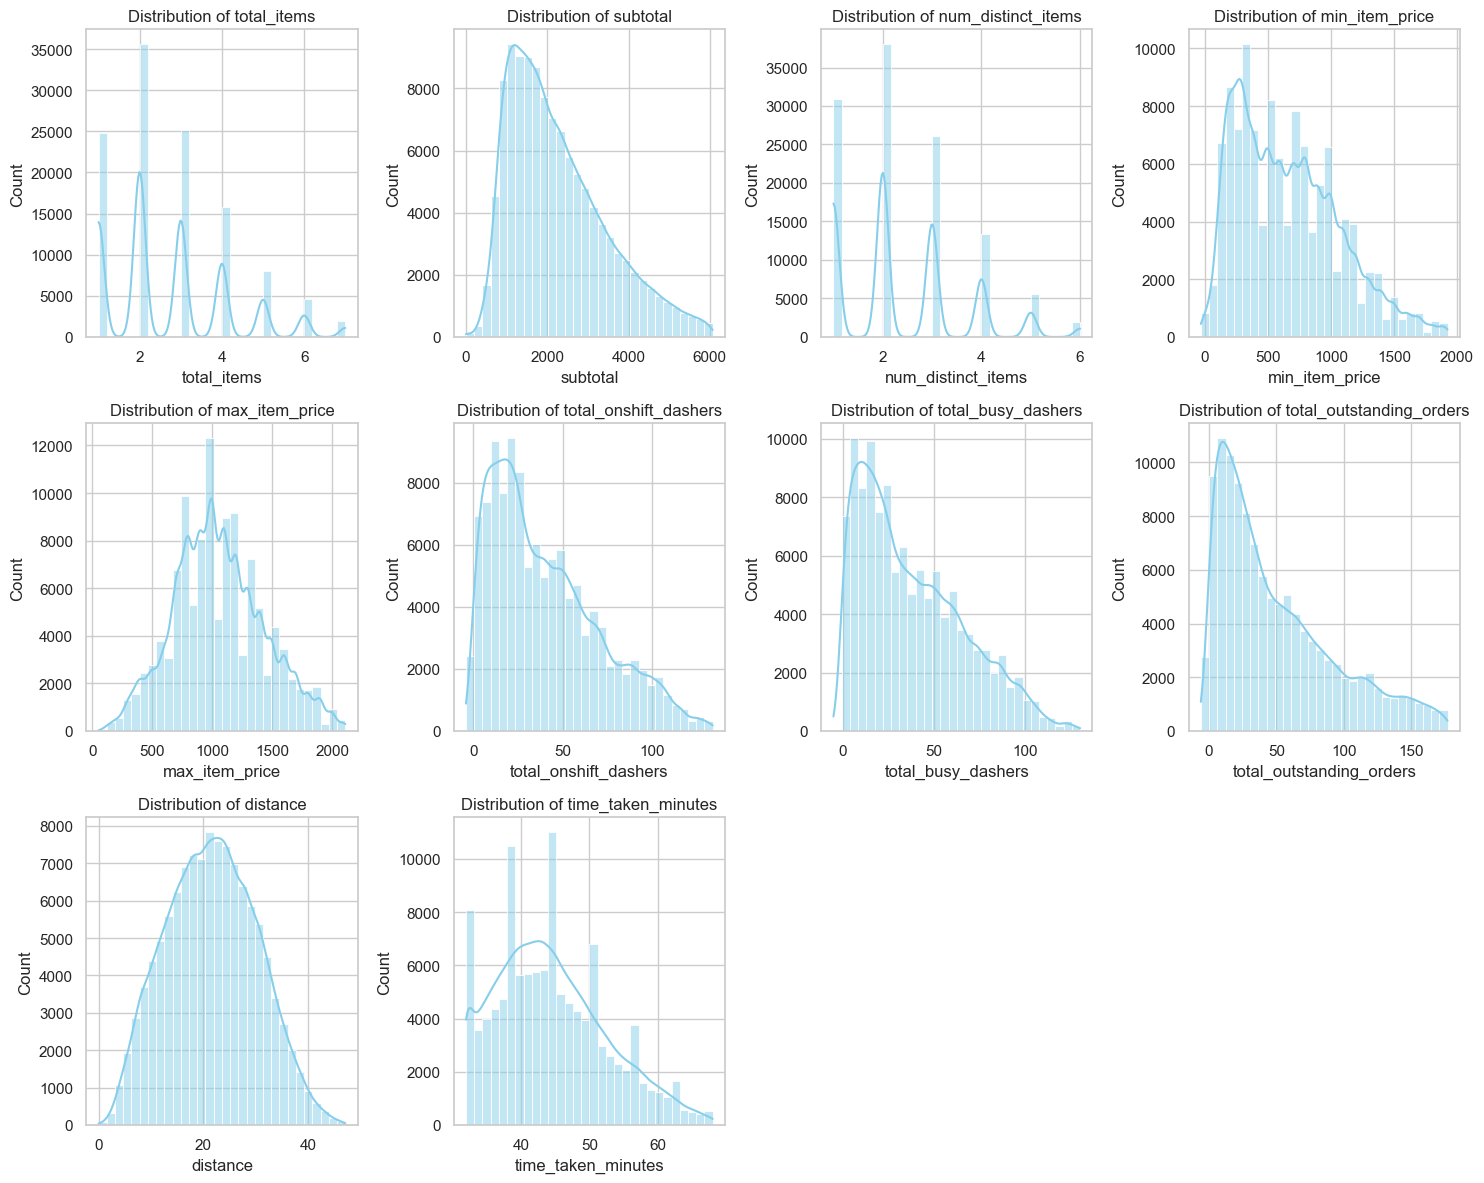

In [165]:
# Plot distributions for all numerical columns

sns.set(style="whitegrid")

# Create subplots for numerical columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # 3 rows and 4 columns for plots
    sns.histplot(porterAfterOutlier[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

##### **4.1.2**
Check the distribution of categorical features

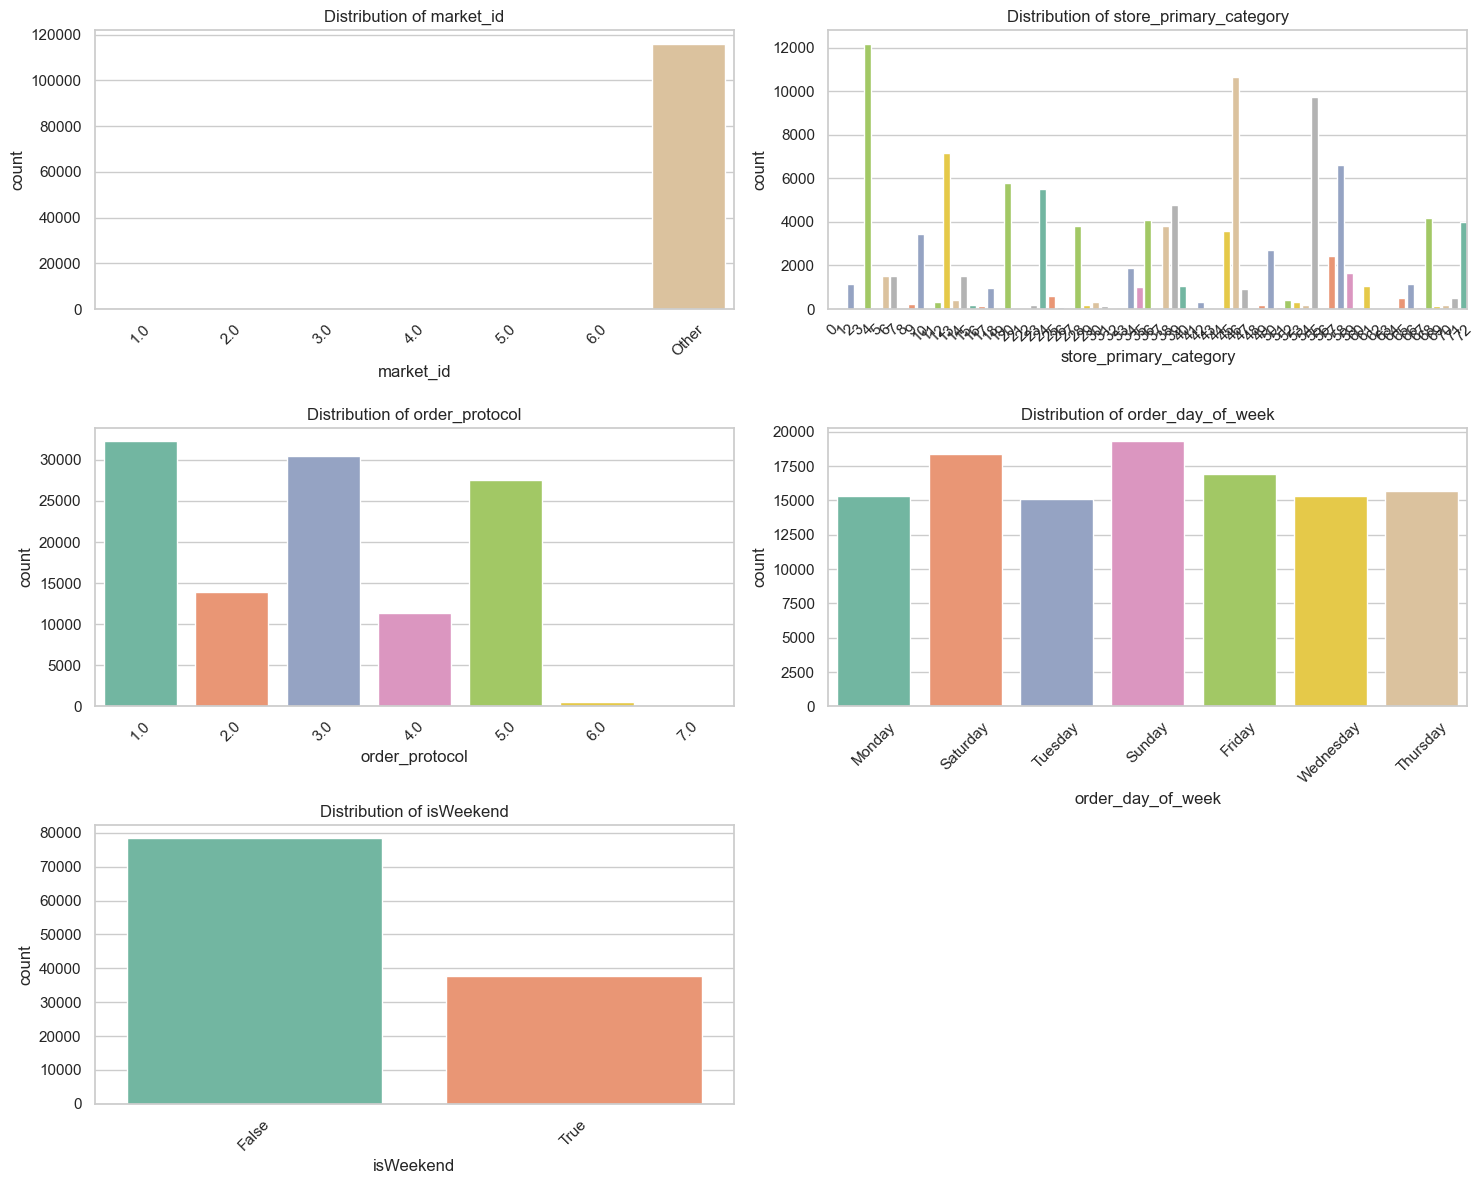

In [167]:
# Distribution of categorical columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)  # 3 rows and 2 columns for plots
    sns.countplot(x=porterAfterOutlier[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()

plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

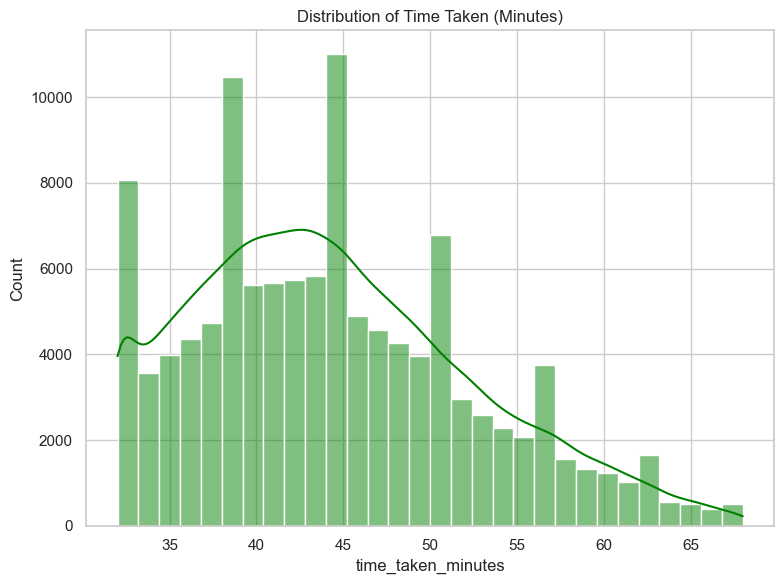

In [169]:
# Distribution of time_taken

plt.figure(figsize=(8, 6))
sns.histplot(porterAfterOutlier['time_taken_minutes'], kde=True, bins=30, color='green')
plt.title('Distribution of Time Taken (Minutes)')
plt.tight_layout()
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

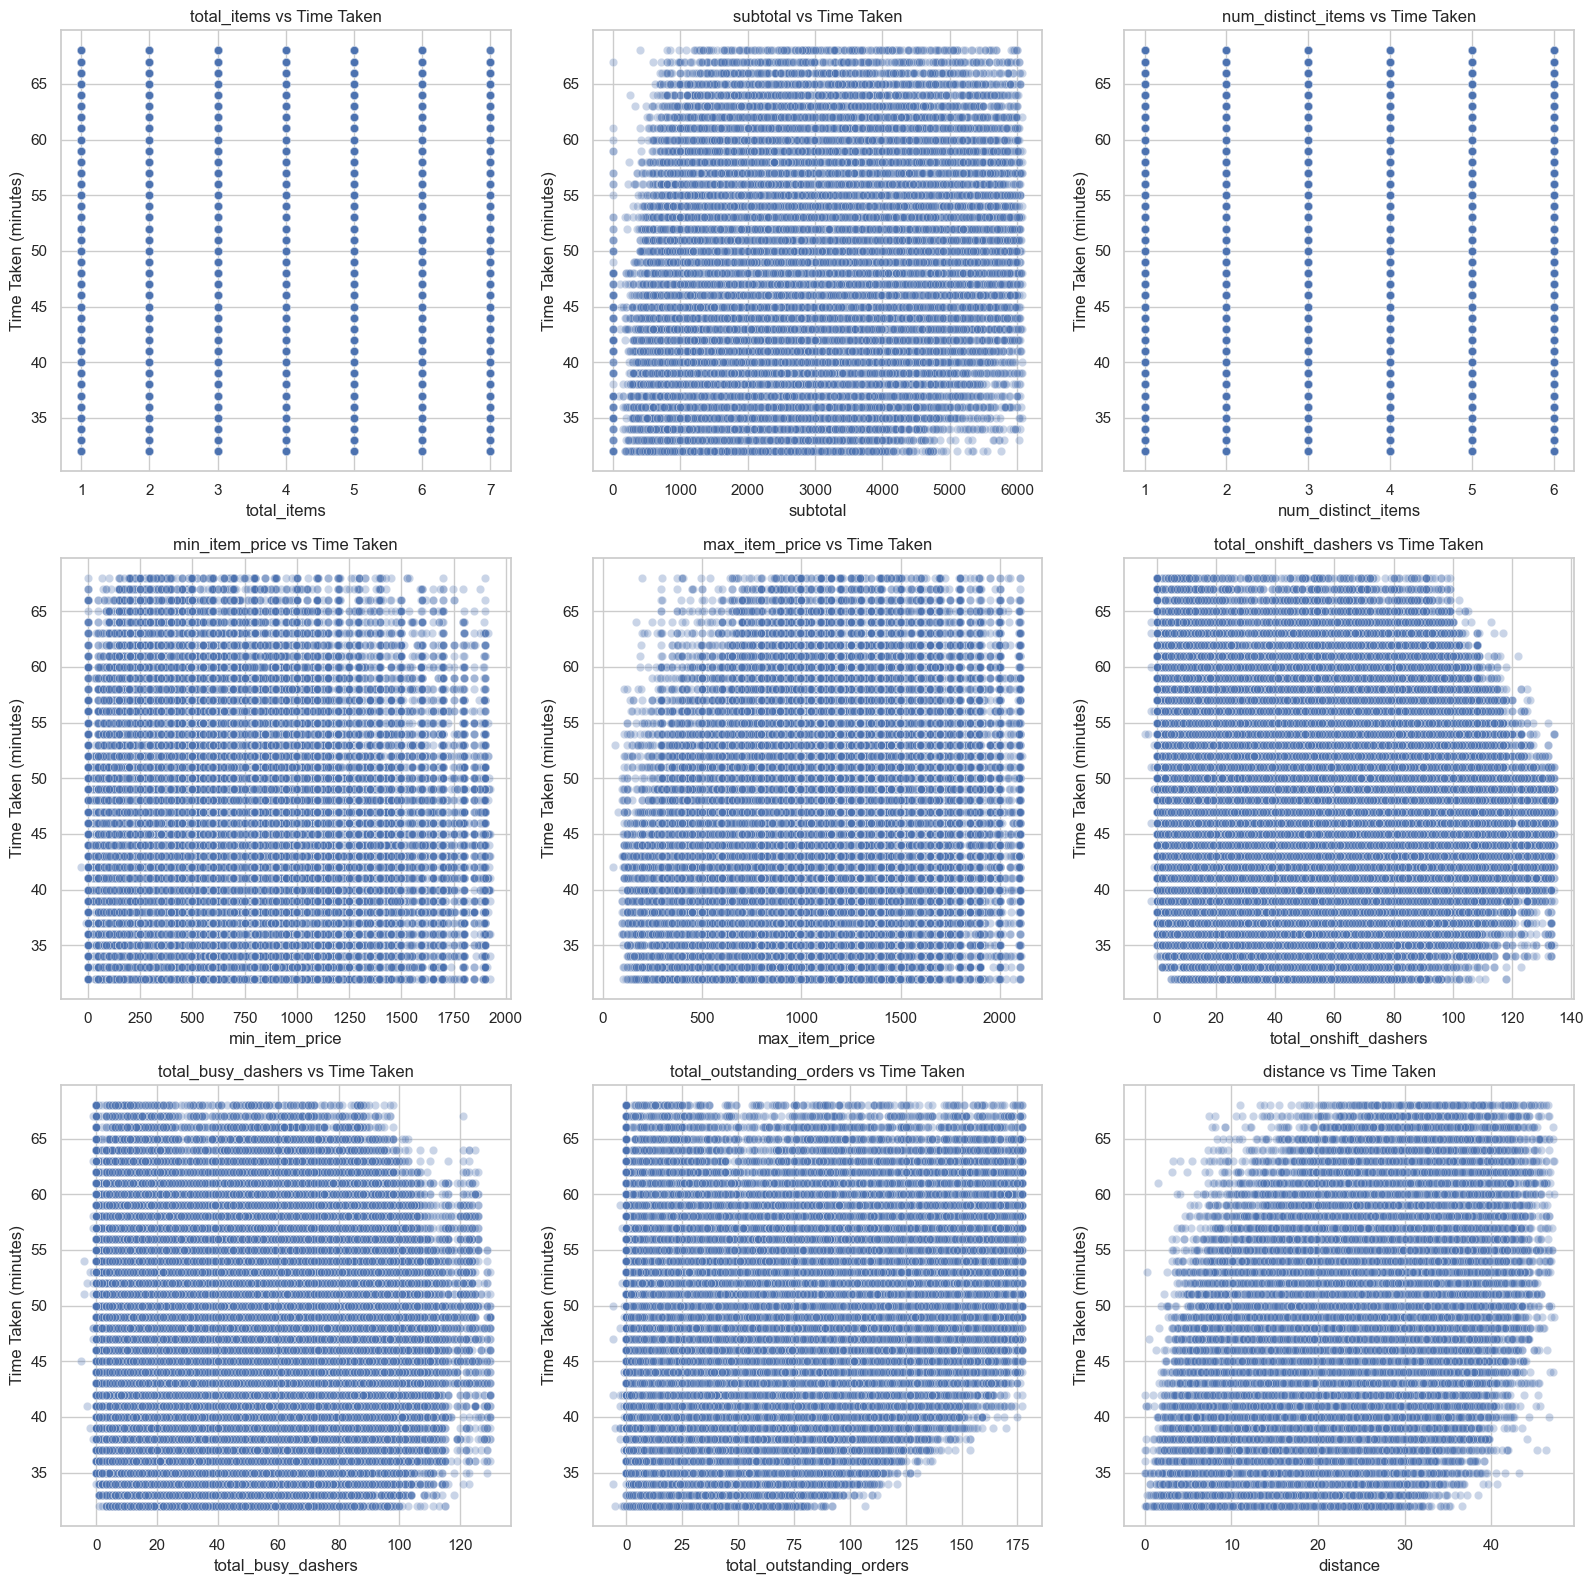

In [171]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.set(style='whitegrid')

# List of numerical columns excluding time_taken_minutes
features_to_plot = [col for col in numerical_cols if col != 'time_taken_minutes']

# Create scatter plots
plt.figure(figsize=(16, 16))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=porterAfterOutlier, x=col, y='time_taken_minutes', alpha=0.3)
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [229]:
# Drop the weakly correlated columns from training dataset
correlation_matrix = porterAfterOutlier[numerical_cols].corr()
cor_target = correlation_matrix['time_taken_minutes'].drop('time_taken_minutes')
# Identify weakly correlated columns
weak_corr_cols = cor_target[abs(cor_target) < 0.1].index.tolist()
print("Weakly correlated columns to drop:", weak_corr_cols)
df_train = porterAfterOutlier.drop(columns=weak_corr_cols)
# Optional: also update your list of numerical columns
numerical_cols = [col for col in numerical_cols if col not in weak_corr_cols]


Weakly correlated columns to drop: []


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [179]:
# Import libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [232]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [234]:
# Create/Initialise the model
y = df_train.pop('time_taken_minutes')  # it will sack time_taken_minutes column
X = df_train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [236]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92828 entries, 81297 to 169633
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 92828 non-null  category
 1   store_primary_category    92828 non-null  category
 2   order_protocol            92828 non-null  category
 3   total_items               92828 non-null  float64 
 4   subtotal                  92828 non-null  float64 
 5   num_distinct_items        92828 non-null  float64 
 6   min_item_price            92828 non-null  int64   
 7   max_item_price            92828 non-null  float64 
 8   total_onshift_dashers     92828 non-null  float64 
 9   total_busy_dashers        92828 non-null  float64 
 10  total_outstanding_orders  92828 non-null  float64 
 11  distance                  92828 non-null  float64 
 12  order_hour                92828 non-null  int32   
 13  order_day_of_week         92828 non-null  obje

In [238]:
# Train the model using the training data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
#lr.fit(X_train, y_train)
selected_columns = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 
                    'total_outstanding_orders', 'distance', 'order_hour']
#X_train_lm =X_train['total_items','subtotal','num_distinct_items','max_item_price','total_outstanding_orders','distance','order_hour']
X_train_lm = sm.add_constant(X_train[selected_columns])
lr = sm.OLS(y_train, X_train_lm).fit()

In [240]:
# Make predictions
lr.params

const                      -0.036735
total_items                -0.023930
subtotal                    0.221575
num_distinct_items          0.095494
max_item_price              0.034764
total_outstanding_orders    0.133938
distance                    0.589534
order_hour                 -0.005225
dtype: float64

In [242]:
# Find results for evaluation metrics

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.052e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        20:28:43   Log-Likelihood:                 34888.
No. Observations:               92828   AIC:                        -6.976e+04
Df Residuals:                   92820   BIC:                        -6.969e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [244]:
# Loop through the number of features and test the model
lm = LinearRegression()
lm.fit(X_train[selected_columns], y_train)
rfe = RFE(estimator=lm, n_features_to_select=8)             # running RFE
rfe = rfe.fit(X_train[selected_columns], y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('market_id', True, 1),
 ('store_primary_category', True, 1),
 ('order_protocol', True, 1),
 ('total_items', True, 1),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('min_item_price', True, 1)]

In [254]:
# Build the final model with selected number of features
selected_features = [
    'market_id',
    'store_primary_category',
    'order_protocol',
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price'
]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
X_train_encoded = pd.get_dummies(X_train_selected, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_selected, columns=categorical_cols, drop_first=True)

# Step 3: Align test to train (important!)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 4: Train the final model
final_model = LinearRegression()
final_model.fit(X_train_encoded, y_train)

# Step 5: Make predictions
y_pred = final_model.predict(X_test_encoded)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

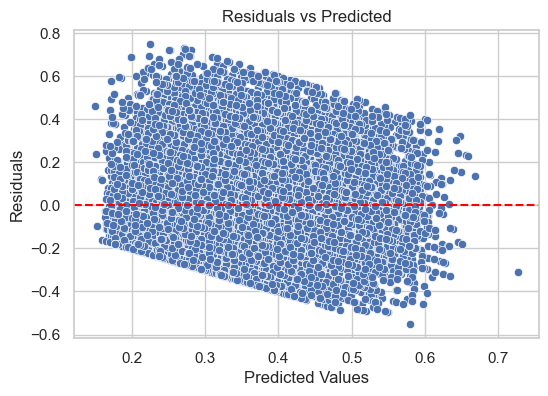

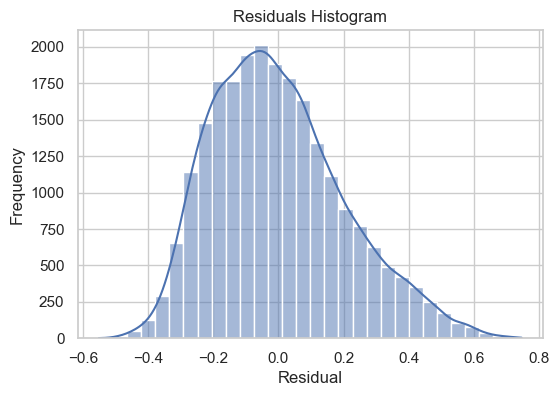

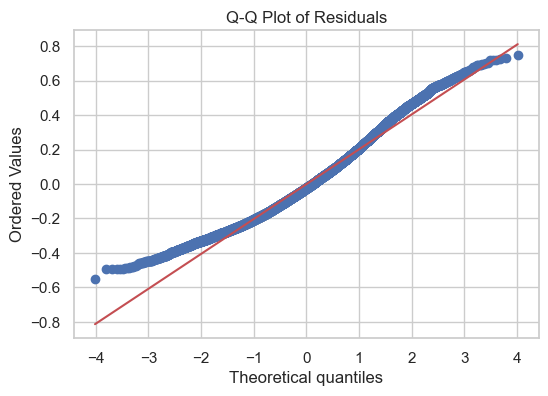

In [258]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats
residuals = y_test - y_pred

# Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


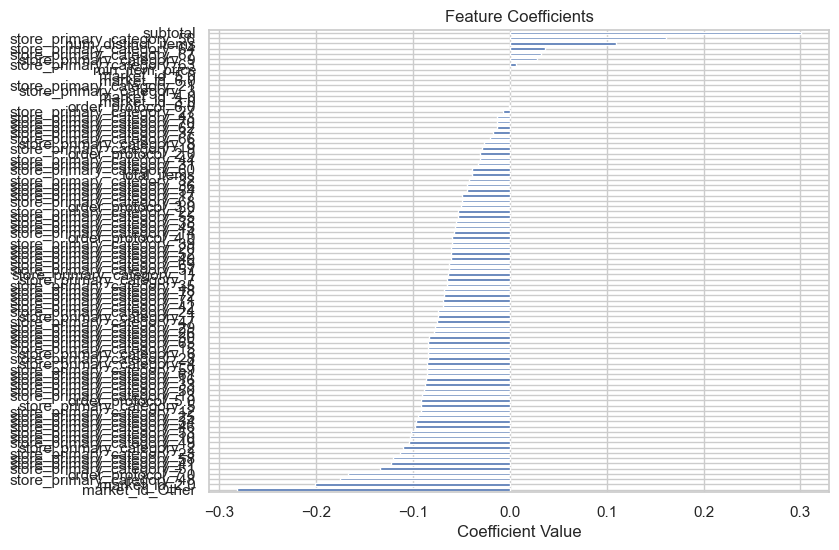

Effect of 'total_items': -0.03936241199508973


In [262]:
# Compare the scaled vs unscaled features used in the final model

coefficients = pd.Series(final_model.coef_, index=X_train_encoded.columns)
coefficients = coefficients.sort_values()

plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title("Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

# Optional: print specific value
print("Effect of 'total_items':", coefficients.get('total_items', 'Not found'))


In [264]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
final_model_scaled = LinearRegression()
final_model_scaled.fit(X_train_scaled, y_train)

scaled_coefficients = pd.Series(final_model_scaled.coef_, index=X_train_encoded.columns)

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [266]:
# Analyze the effect of a unit change in a feature, say 'total_items'

print(f"Effect of 1 additional item: {coefficients['total_items']:.2f} minutes")

Effect of 1 additional item: -0.04 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the below are categorical variables in your dataset:
    >market_id
    >store_primary_category
    >order_protocol
    >isWeekend

>Different store types (e.g., fast food vs. grocery) can significantly affect delivery time due to order complexity and prep time.
>Represents the ordering method — some protocols (like merchant-delivered or pre-order) may take longer.
>Indicates geographical area — delivery times may vary due to traffic or density.
>These variables showed significant impact when one-hot encoded
>some categories increased the predicted delivery time noticeably.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size is one of the parameter of the train_test_split function. "test_size = 0.2" means it reserves 20% of data for testing and remaining 80% of data for the training.
>Ensures the model is trained on a large portion of the data and validated on unseen data to measure generalization.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>We find subtotal, total_items, or distance has the highest correlation with time_taken_minutes(the target variable).

Among them, subtotal often has a strong correlation because higher-priced orders tend to be larger and take more time.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>We identified using the distributions of numerical and categorical variables and used the Interquartile Range (IQR) method to detect the outliers and address the same. 



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>From RFE and coefficient analysis, top 3 impactful features were likely:

total_items – More items = longer delivery prep and packaging time.

subtotal – Higher subtotals typically indicate larger, more complex orders.

min_item_price or store_primary_category_* – High-value items or certain store categories may require longer prep time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
A linear regression model is a statistical method used to model the relationship between a dependent variable and one or more independent variables, assuming a linear relationship exists between them. It finds a line or surface that best fits the data points by minimizing the difference between predicted and actual values. This line or surface represents the relationship between the variables, allowing for predictions of the dependent variable based on the independent variable(s). 
Linear regression models the relationship between one or more independent variables (X) and a continuous target variable (y) by fitting a straight line.
>
>Dependent Variable:
The variable you're trying to predict (e.g., sales, price). 
Independent Variable(s):
The variable(s) used to make the prediction (e.g., advertising spend, number of units sold). 



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression:

Involves only one independent variable (predictor) and one dependent variable (target).

The relationship is modeled with a straight line (linear equation).

Equation:
            y= β0+β1x+ϵ
Example: Predicting delivery time based on total_items.

> Multiple Linear Regression:

Involves multiple independent variables (predictors) to predict a dependent variable.

The relationship is modeled with a hyperplane (multidimensional line).

Equation:
        y= β0+β1x1+β2x2+β3x3+.......+βnxn+ϵ

Example: Predicting delivery time based on total_items, subtotal, distance, etc.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function (also called the loss function) quantifies how well the model's predictions match the actual values. In linear regression, the most common cost function is Mean Squared Error (MSE).It's typically minimized using gradient descent, an iterative optimization algorithm.

>Role:
The cost function helps assess how well the model performs. The goal is to minimize the error between the predicted and actual values.
>Minimizing the Cost:
Gradient Descent is the most common method used to minimize the cost function.
The algorithm updates the model’s coefficients iteratively to minimize the MSE by calculating the gradient (slope) of the cost function.
It adjusts the weights to move downhill (i.e., toward the minimum value of the cost function).



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting:
Occurs when the model is too complex and fits the training data too well — even capturing the noise.
The model performs well on training data but poorly on unseen test data.

>This means the model is not generalizing well to new data.
Symptoms of Overfitting:
High accuracy on training data, low accuracy on test data.
Complex model (too many features, high-degree polynomials).
Solution: Use simpler models, apply regularization (like L1/L2 regularization), and increase the amount of data.


>Underfitting: Occurs when the model is too simple to capture the underlying trend in the data.
The model has high bias, making poor predictions on both training and test data.

>Symptoms of Underfitting:
Low accuracy on both training and test data.
Model too simple (like a straight line trying to model complex relationships).

>Solution: Use more complex models, increase model features, or reduce regularization.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help assess the validity of the linear regression assumptions and identify potential issues:

>Residuals are the differences between the actual values and the predicted values:
>
>Types of Residual Plots:
Residuals vs. Predicted Values:
Plots residuals on the y-axis and predicted values on the x-axis.
Goal: Check if residuals are randomly scattered around zero.
Random scattering means the model is fitting well, and assumptions (like linearity and homoscedasticity) are valid.
Patterns or non-random clustering indicate that the model might not be capturing the true relationship or that the assumptions have been violated.


>Histogram of Residuals:
Shows the distribution of residuals.
Goal: Check for normality of residuals (should resemble a bell curve).
Skewed or non-normal residuals suggest the need for a non-linear model or transformation of the data.


>Q-Q Plot (Quantile-Quantile Plot):
Compares the distribution of residuals with a normal distribution.
Goal: Check if residuals follow a normal distribution.
Deviations from the diagonal line indicate non-normal residuals.